### Business Problem/Objective:
To provide accurate and actionable advice to homeowners on how specific home upgrades may increase the assessed worth of their houses and by how much. This advice is critical for homeowners to make informed decisions about investing in renovations that will maximize their return on investment when purchasing or selling a home.

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

## Load the Housing Data Set

Basic Understanding of the Data set

In [17]:
# Load the data and read the first ten rows of the data set
df_housing = pd.read_csv('../data/kc_house_data.csv', index_col=0)

# Display the first few rows of the DataFrame
df_housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Dataframe Outlook:
The housing data set has a dataframe with 21597 rows and 21 columns

# Get information about the DataFrame

In [9]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Basic statistical details of numeric columns

In [18]:
df_housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Check on the number of columns in the dataset.

In [4]:
# check on the column structure
df_housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Description of the Columns in the Housing Data Set
* **id** - unique identity for a house
* **date** - Date house was sold
* **price** -  Price prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** - Number of bathrooms/bedrooms
* **sqft_living** - square footage of the home
* **sqft_lot** - square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an essential step in the data science process, where you analyze and summarize the main characteristics of a dataset, often using visual methods.

# Data Cleaning

In [19]:
df_housing.isnull().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Handle missing values

Drop Multiple Columns as advised in the project notes.

In [29]:
# Drop columns as advised in the project notes
df_housing1 = df_housing.drop(columns=['date','view', 'sqft_above', 'sqft_basement', 'yr_renovated', 
                                       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)
df_housing1.head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987
7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,2001
1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1995
2008000270,291850.0,3,1.50,1060,9711,1.0,0.0,3,7,1963
2414600126,229500.0,3,1.00,1780,7470,1.0,0.0,3,7,1960


In [21]:
# Now check missing values
df_housing1.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

Check the Description of the Remaining Columns

In [23]:
df_housing1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.8 MB


The column = waterfront is a float type carrying data, the missing values can thus be repalced as the missing data is quite higher (2376). 

# Check the mean, mode and median for the waterfront column only

In [27]:
# Check the mean, mode and median for the waterfront column only
waterfront_mean = df_housing1['waterfront'].mean()
waterfront_mode = df_housing1['waterfront'].median()
waterfront_median = df_housing1['waterfront'].mode()

print('Mean:', waterfront_mean)
print('Median:', waterfront_median)
print('Mode:', waterfront_mode)

Mean: 0.007595858696217679
Median: 0    0.0
dtype: float64
Mode: 0.0


# Conclusion: 
Neither Mean, Median nor Mode has a significant value to affect the model if used to replace the null values in the column named waterfront. Either can be used but in this case, mean would suit perfectly as it has some significant values in it, I will choose the mean to represent the null values.

In [31]:
# Replace values with the mean
df_housing1['waterfront'] = waterfront_mean

In [43]:
df_housing1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,0.007596,3,7,1955
6414100192,538000.0,3,2.25,2570,7242,2.0,0.007596,3,7,1951
5631500400,180000.0,2,1.00,770,10000,1.0,0.007596,3,6,1933
2487200875,604000.0,4,3.00,1960,5000,1.0,0.007596,5,7,1965
1954400510,510000.0,3,2.00,1680,8080,1.0,0.007596,3,8,1987


 # Check for duplicate rows

In [34]:
df_housing1.duplicated().sum()

8

Check for columns with duplicate values:

In [35]:
duplicate_columns = []
for col in df_housing1.columns:
    if df_housing1[col].duplicated().any():
        duplicate_columns.append(col)

print("Columns with duplicates:", duplicate_columns)

Columns with duplicates: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']


# Remove duplicate rows

We can use this in case we agree on remiving the duplicates:

df_housing1.drop_duplicates(inplace=True)

# Data Visualization

Univariate Analysis

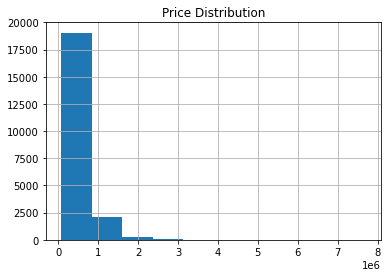

In [96]:
# Histogram
df_housing1['price'].hist()
plt.title('Price Distribution')
plt.show()

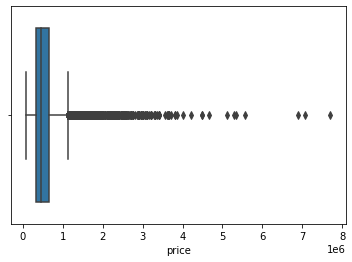

In [39]:
# Boxplot
sns.boxplot(x=df_housing1['price'])
plt.show()

The box plot shows a considerable skew in the data, with a large number of outliers at the higher end of the price range. The majority of property prices are clustered at the lower end, indicating a greater concentration of low-cost houses. The extended tail of outliers shows that there are many high-value homes in the dataset, which could indicate a wide differential in housing prices. This distribution shows that, while the majority of homes are generally reasonable, a few extraordinarily expensive homes dramatically elevate the upper limit of the price range.

# Bivariate Analysis

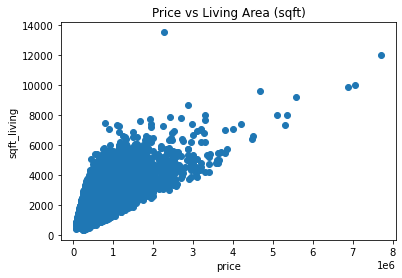

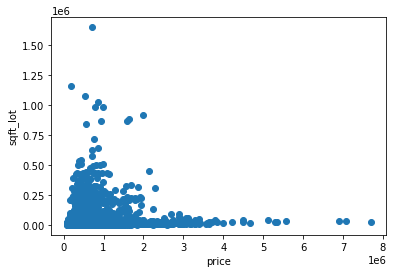

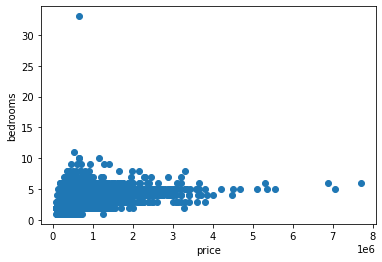

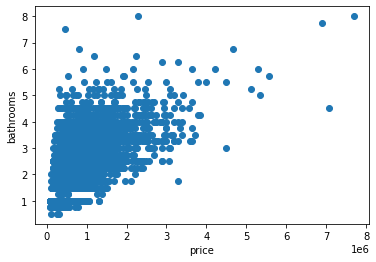

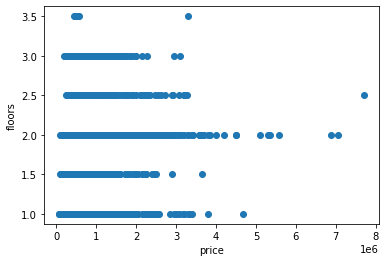

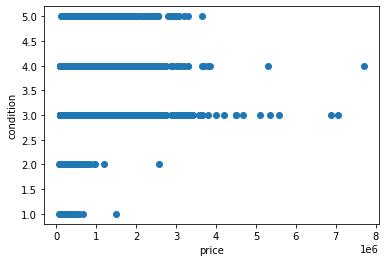

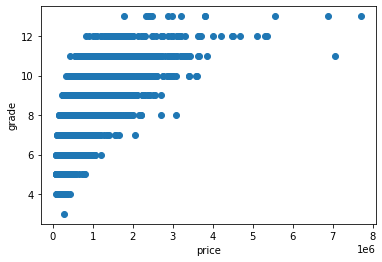

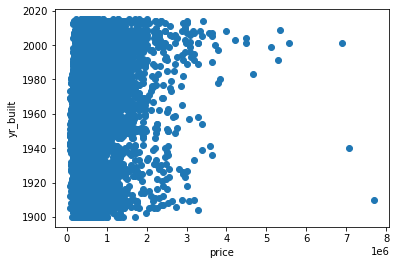

In [91]:
# Scatter Plot

plt.scatter(df_housing1['price'], df_housing1['sqft_living'])
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.title('Price vs Living Area (sqft)')
plt.show()

plt.scatter(df_housing1['price'], df_housing1['sqft_lot'])
plt.xlabel('price')
plt.ylabel('sqft_lot')
plt.show()

plt.scatter(df_housing1['price'], df_housing1['bedrooms'])
plt.xlabel('price')
plt.ylabel('bedrooms')
plt.show()

plt.scatter(df_housing1['price'], df_housing1['bathrooms'])
plt.xlabel('price')
plt.ylabel('bathrooms')
plt.show()

plt.scatter(df_housing1['price'], df_housing1['floors'])
plt.xlabel('price')
plt.ylabel('floors')
plt.show()

plt.scatter(df_housing1['price'], df_housing1['condition'])
plt.xlabel('price')
plt.ylabel('condition')
plt.show()

plt.scatter(df_housing1['price'], df_housing1['grade'])
plt.xlabel('price')
plt.ylabel('grade')
plt.show()

plt.scatter(df_housing1['price'], df_housing1['yr_built'])
plt.xlabel('price')
plt.ylabel('yr_built')

plt.show()

There is a strong positive association between price and sqft_living. As the square footage of the living area increases, so does the price.

Data Clustering: The vast majority of the data points are clustered at the bottom end of both price and sqft_living. This suggests that most residences have smaller living spaces and lower pricing.

Outliers: A few places have much higher pricing and larger living areas. These spots are distributed far from the main cluster, indicating that the properties are significantly more expensive and larger than the norm.

Density of Data Points: The plot is denser at the bottom, indicating that there are more properties in the lower price and living area range.

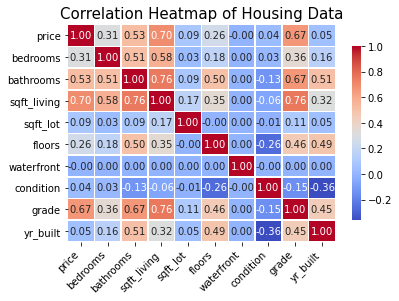

In [85]:
# Correlation Heatmap:
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, cbar_kws={"shrink": .8}, annot_kws={"size": 10})


# Customize the plot further
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Correlation Heatmap of Housing Data', fontsize=15)
plt.show()

Price and sqft_living have a strong positive correlation (0.70), indicating that as living area increases, so do prices.
Grade and price (0.67): greater-grade properties command greater prices.
sqft_living and grade (0.76): Larger living areas typically receive higher grades.
sqft_living and bathrooms (0.58): More bathrooms correspond to greater living areas.
sqft_lot and floors (0.35): Properties with greater lot sizes typically have more floors.

There is a moderate positive correlation (0.53) between price and number of bathrooms, indicating that having more bathrooms leads to higher prices.
Price and bedrooms (0.31): More bedrooms are generally associated with higher prices, but the relationship is not as strong as for bathrooms or living space.
Price and sqft_lot (0.26): Larger lot sizes show a positive but weaker link with higher prices.
sqft_lot and yr_built (0.49): More recently built houses usually have greater lot sizes.

Waterfront has weak or no association with other variables, showing minimal variation with these properties.
Condition has low correlations with other variables, indicating that it is relatively independent of the other aspects.
Other than sqft_lot, yr_built has a low association with other factors.

There is a negative correlation (-0.36) between year_built and grade, indicating that newer homes receive lower grades.
yr_built and bathrooms (-0.13): There is a somewhat negative relationship between the year built and the number of bathrooms.
Condition and sqft_living (-0.06): Condition and living area have a very weak negative connection.


# Multivariate Analysis

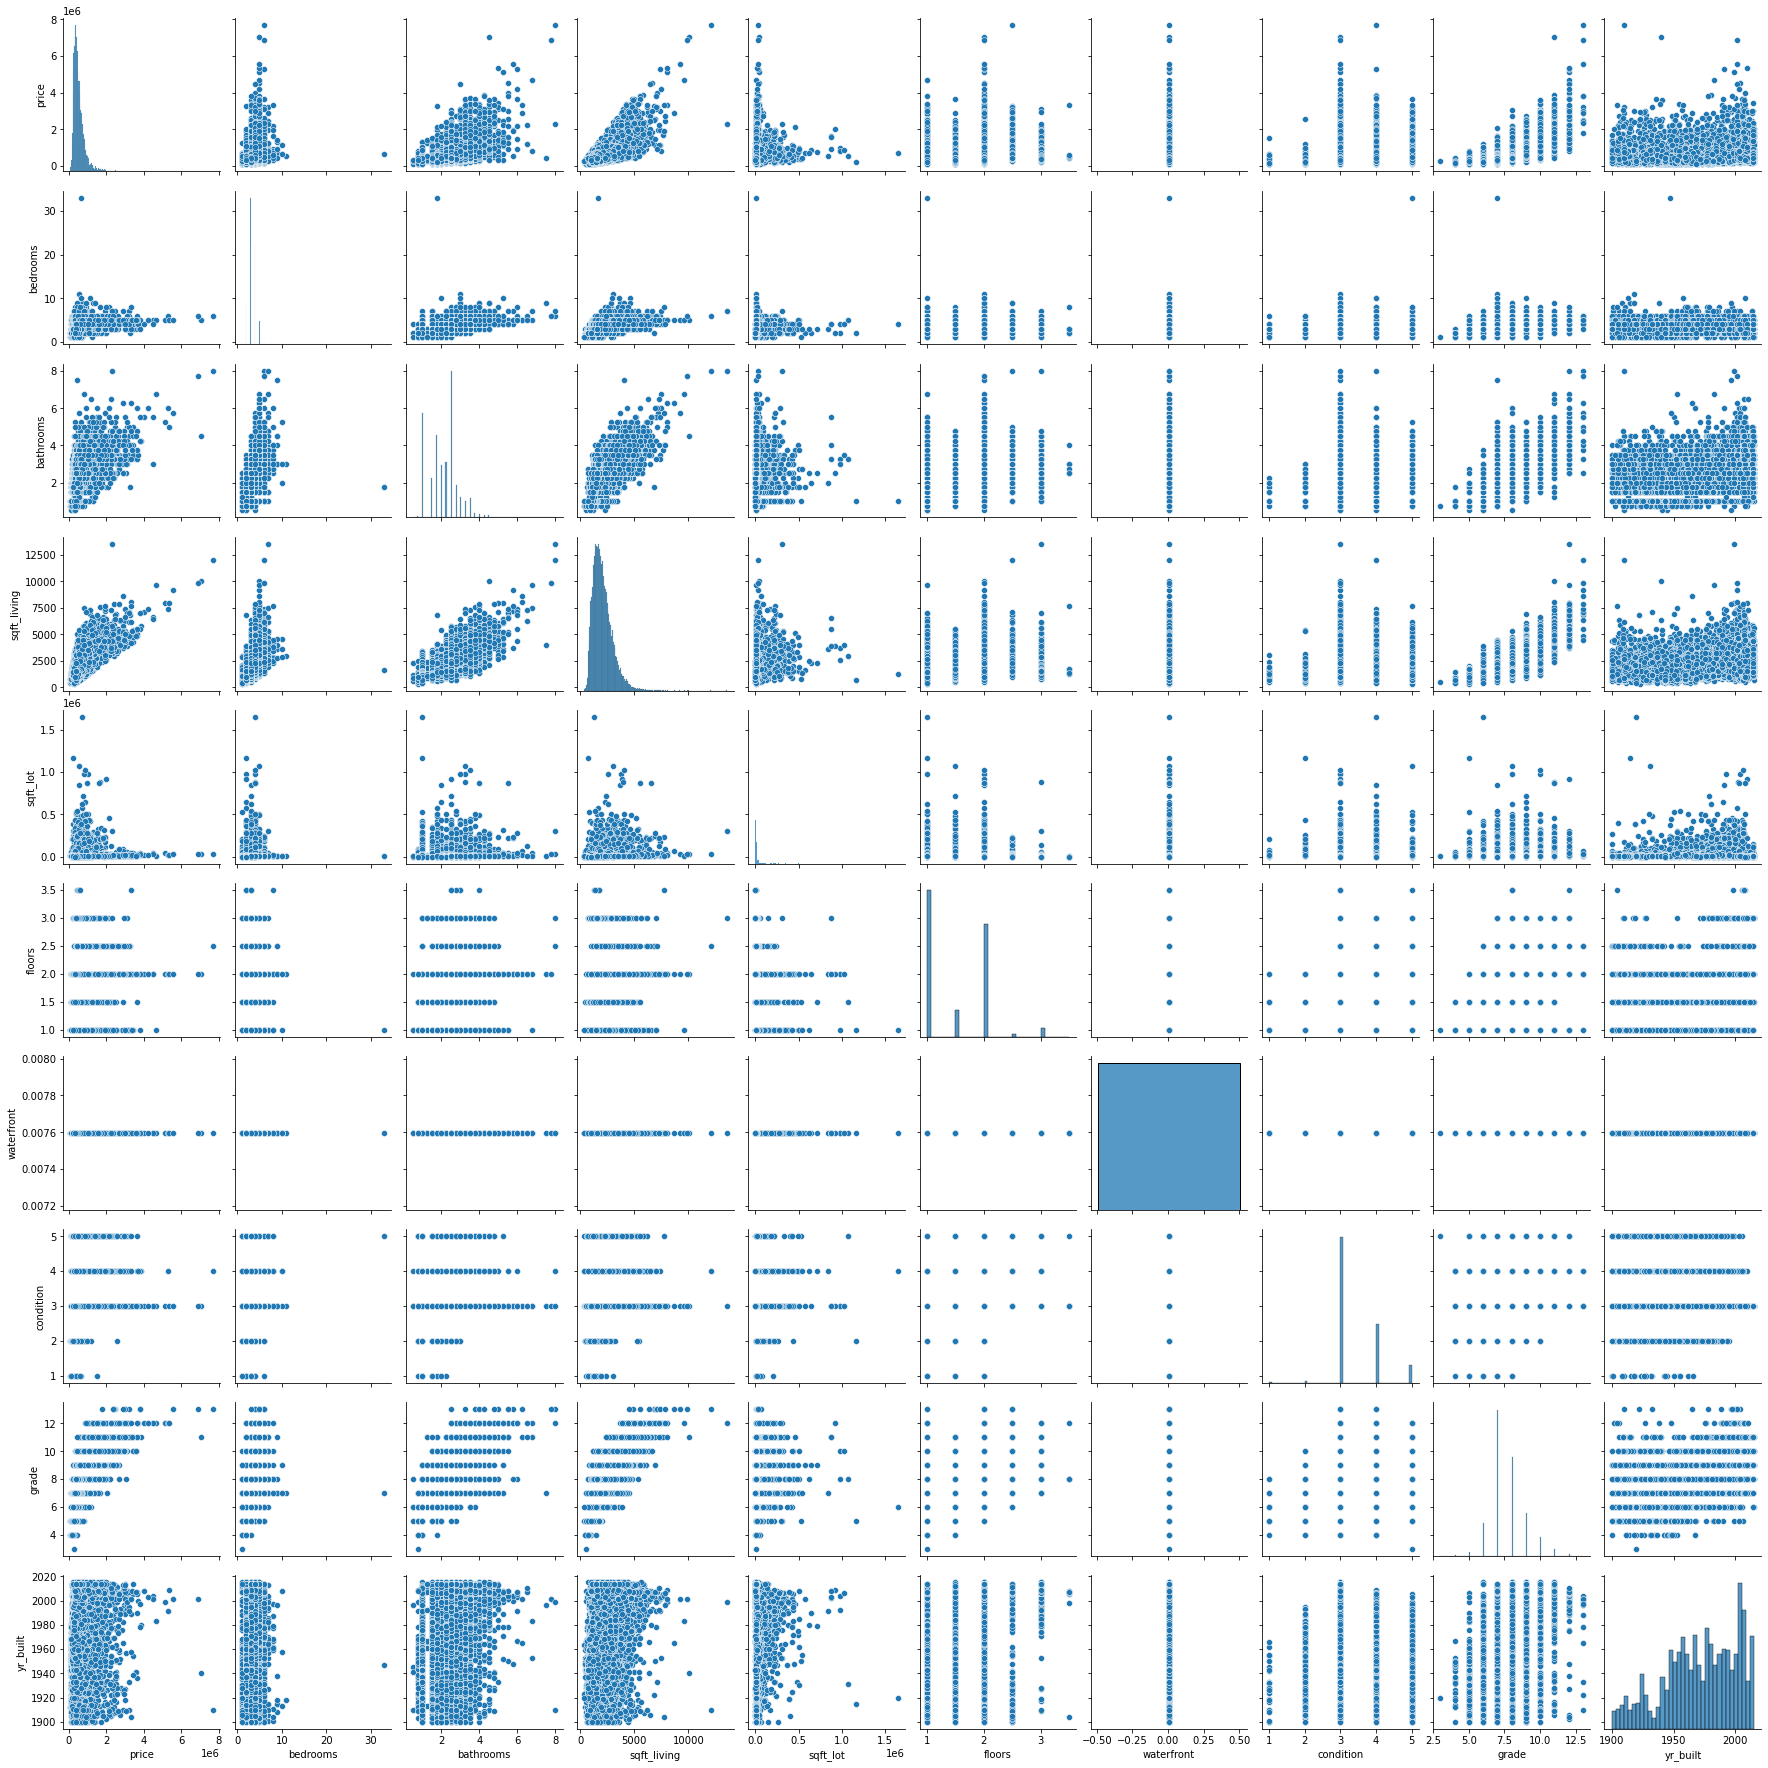

In [41]:
# PairPlot
sns.pairplot(df_housing1)
plt.show()

The scatter plot matrix depicts the pairwise correlations and distributions of several features in the dataset, including price, bedrooms, bathrooms, square footage of living area and lot, floors, waterfront status, condition, grade, and year built. It exposes some patterns and correlations, such as a positive relationship between price and square footage of living area, showing that larger residences tend to be more expensive. Furthermore, the distributions of distinct features exhibit varying degrees of skewness and dispersion, shedding light on the data's properties and unpredictability. This visual analysis reveals key links and patterns that can be investigated further using predictive modeling and feature engineering to improve the accuracy of house price predictions.

# Identifying Patterns and Relationships

In [42]:
# Grouping and Aggregating
df_housing1.groupby('price').mean()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,,,,,,,,,
78000.0,2.0,1.00,780.0,16344.0,1.0,0.007596,1.0,5.0,1942.0
80000.0,1.0,0.75,430.0,5050.0,1.0,0.007596,2.0,4.0,1912.0
81000.0,2.0,1.00,730.0,9975.0,1.0,0.007596,1.0,5.0,1943.0
82000.0,3.0,1.00,860.0,10426.0,1.0,0.007596,3.0,6.0,1954.0
82500.0,2.0,1.00,520.0,22334.0,1.0,0.007596,2.0,5.0,1951.0
...,...,...,...,...,...,...,...,...,...
5350000.0,5.0,5.00,8000.0,23985.0,2.0,0.007596,3.0,12.0,2009.0
5570000.0,5.0,5.75,9200.0,35069.0,2.0,0.007596,3.0,13.0,2001.0
6890000.0,6.0,7.75,9890.0,31374.0,2.0,0.007596,3.0,13.0,2001.0


In [98]:
# Pivot Tables
pivot_table = pd.pivot_table(df_housing1, values='price', index='bedrooms', columns='condition', aggfunc=np.mean)
print(pivot_table)

condition              1              2             3              4  \
bedrooms                                                               
1          285500.000000  241500.000000  3.155141e+05  345267.021277   
2          277291.666667  275906.725490  4.012932e+05  405984.607242   
3          400743.750000  296336.463768  4.672205e+05  454366.696791   
4          445750.000000  473527.222222  6.336545e+05  616164.208680   
5                    NaN  235500.000000  8.133121e+05  708327.956938   
6          432500.000000  524816.666667  7.869837e+05  875065.517241   
7                    NaN            NaN  9.181944e+05  851128.555556   
8                    NaN            NaN  7.920000e+05  920000.000000   
9                    NaN            NaN  8.939998e+05            NaN   
10                   NaN            NaN  1.150000e+06  655000.000000   
11                   NaN            NaN  5.200000e+05            NaN   
33                   NaN            NaN           NaN           

The data reveals that both the number of bedrooms and the quality of the house have a substantial impact on the price, with better-maintained homes and those with more bedrooms commanding higher prices. However, some categories, particularly those with a large number of bedrooms, have limited data, which may have an impact on overall trends.

# Outlier Detection

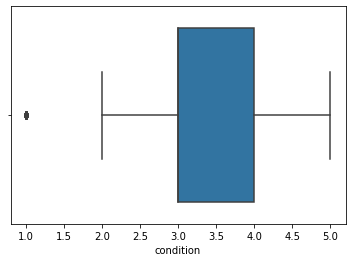

In [47]:
# Using Boxplots
sns.boxplot(x=df_housing1['condition'])
plt.show()


Using Z-scores

In [54]:
from scipy import stats
z_scores = stats.zscore(df_housing1['condition'])
abs_z_scores = np.abs(z_scores)
outliers = df_housing1[abs_z_scores > 3]
outliers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
id,,,,,,,,,,
9435300030,550000.0,4,1.00,1660,34848,1.0,0.007596,1,5,1933
1726059053,270000.0,2,1.50,1380,209959,1.0,0.007596,1,6,1954
5175800060,365000.0,4,2.00,1940,25600,1.0,0.007596,1,8,1962
5694000710,352950.0,3,1.00,1760,3000,1.5,0.007596,1,6,1900
913000340,252000.0,1,1.00,680,1638,1.0,0.007596,1,6,1910
3886902445,535000.0,2,1.00,920,9000,1.0,0.007596,1,6,1954
9187200245,441000.0,4,1.50,1100,3300,1.0,0.007596,1,7,1919
723049596,255000.0,2,1.00,810,7980,1.0,0.007596,1,6,1928
6324000090,210000.0,2,1.00,990,8140,1.0,0.007596,1,6,1910


# Key Observations:
**Duplicate Records**: There are duplicate records in the dataset. For example, the property with id 2023049218 appears twice with different prices.

**Range of Values**: There is a significant range in property prices, from as low as $78,000 to as high as $1,500,000.

**Variability in Features**: Properties vary widely in terms of square footage of both living areas and lots, the number of floors, and the year built.

# Feature Engineering

Based on the provided dataset, some of the potential new features that can be created are:

Age of the House: Calculate the age of the house from the year it was built.

Price per Sqft: Calculate the price per square foot of living space.

Total Bathrooms: Separate full and partial bathrooms to get a total count.

Total Rooms: Sum bedrooms and bathrooms to get a total count of rooms.

Living Area Ratio: Ratio of living area to lot area.

In [99]:
# Generating new features from the data set
# Age of the House
df_housing1['age'] = 2024 - df_housing1['yr_built']

# Price per Sqft:
df_housing1['price_per_sqft'] = df_housing1['price'] / df_housing1['sqft_living']

# Total Bathrooms
df_housing1['total_bathrooms'] = df_housing1['bathrooms'] + df_housing1['floors']

#Total Rooms
df_housing1['total_rooms'] = df_housing1['bedrooms'] + df_housing1['bathrooms']

# Living Area Ratio.
df_housing1['living_area_ratio'] = df_housing1['sqft_living'] / df_housing1['sqft_lot']

df_housing1.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,age,price_per_sqft,total_bathrooms,total_rooms,living_area_ratio
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,7.595859e-03,3.409825,7.657915,1970.999676,53.000324,264.143368,3.609923,5.489026,0.323755
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,8.673818e-19,0.650546,1.173200,29.375234,29.375234,110.000061,1.140064,1.477276,0.268460
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,7.595859e-03,1.000000,3.000000,1900.000000,9.000000,87.588235,1.500000,1.500000,0.000610
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,7.595859e-03,3.000000,7.000000,1951.000000,27.000000,182.291667,2.750000,4.500000,0.156663
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,7.595859e-03,3.000000,7.000000,1975.000000,49.000000,244.644550,3.500000,5.500000,0.247666
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,7.595859e-03,4.000000,8.000000,1997.000000,73.000000,318.333333,4.500000,6.500000,0.407609
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,7.595859e-03,5.000000,13.000000,2015.000000,124.000000,810.138889,11.000000,34.750000,4.653846


In [72]:
df_housing_features = df_housing1[['age']['price_per_sqft']['total_bathrooms']['total_rooms']['living_area_ratio']]

KeyError: 'price_per_sqft'

In [107]:
df_housing1.shape

(21597, 15)

# Feature Selection

Preprocessing the Data

In [100]:
# Define the features and target variable
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'age', 'price_per_sqft', 'total_bathrooms', 'total_rooms', 'living_area_ratio']
target = 'price'

X = df_housing1[features]
y = df_housing1[target]

In [101]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Selection and Training

We will use a linear regression model

In [102]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

Model Evaluation

In [103]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 15966905614.59854
R^2 Score: 0.8773816484337199


Making Predictions

We use the trained model to make predictions on new data.

In [104]:
# Predict the price
predicted_price = model.predict(df_housing1)
print(f'Predicted Price: {predicted_price[0]}')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 13 is different from 15)